# Car Assurance Classification

#### import libraries

https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=test.csv

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", category=FutureWarning)


#### load dataset

In [28]:
df = pd.read_csv('./train.csv')

### show dataset

In [29]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 

df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### check null values

In [30]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [31]:

# for column in df.select_dtypes(include=['object']).columns:
#     unique_counts = df[column].value_counts()
#     plt.figure(figsize=(6, 4))
#     sns.barplot(x=unique_counts.index, y=unique_counts.values)
#     plt.title(f"Unique values in {column}")
#     plt.xlabel(column)
#     plt.ylabel("Frequency")
#     plt.show()


# for column in df.select_dtypes(include=['object']).columns:
#     unique_values = df[column].unique()
#     plt.figure(figsize=(6, 4))
#     sns.barplot(x=unique_values, y=[1]*len(unique_values))  
#     plt.title(f"Unique values in {column}")
#     plt.xlabel(column)
#     plt.ylabel("Frequency (Fixed to 1 for visualization)")
#     plt.show()


### drop static columns

In [32]:
df = df.drop(columns=['rear_brakes_type','policy_id', 'is_tpms','is_power_steering','is_speed_alert'])

In [33]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


### boxplot for specific column

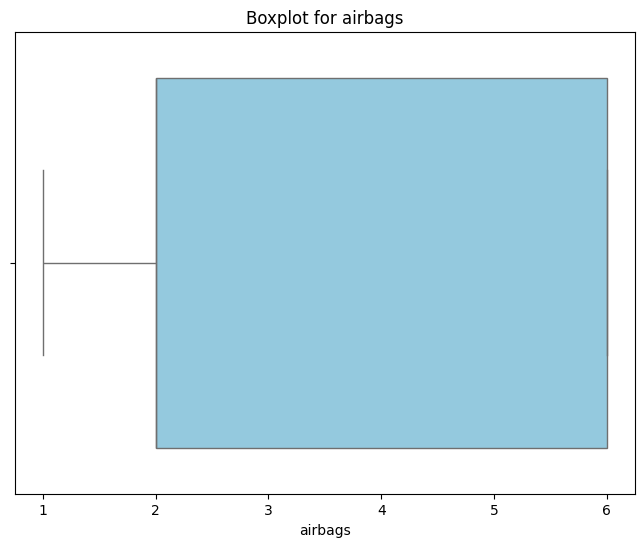

In [34]:
column_to_visualize = 'airbags'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_to_visualize], color='skyblue')
plt.title(f'Boxplot for {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.show()



### Remove outliers

In [35]:
columns_to_process = ['age_of_policyholder','make','airbags','age_of_car', 'age_of_policyholder' ,'population_density','gear_box','height']

print("Original Dataset Shape:", df.shape)

for column in columns_to_process:
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Cleaned Dataset Shape:", df.shape)


Original Dataset Shape: (58592, 39)
Cleaned Dataset Shape: (35835, 39)


### Count target classes to determine sampling

In [36]:
column_to_check = 'is_claim'

value_counts = df[column_to_check].value_counts()

print(value_counts)


is_claim
0    33478
1     2357
Name: count, dtype: int64


## show boxplot
Note: some are not outliers, they are because of minority classes


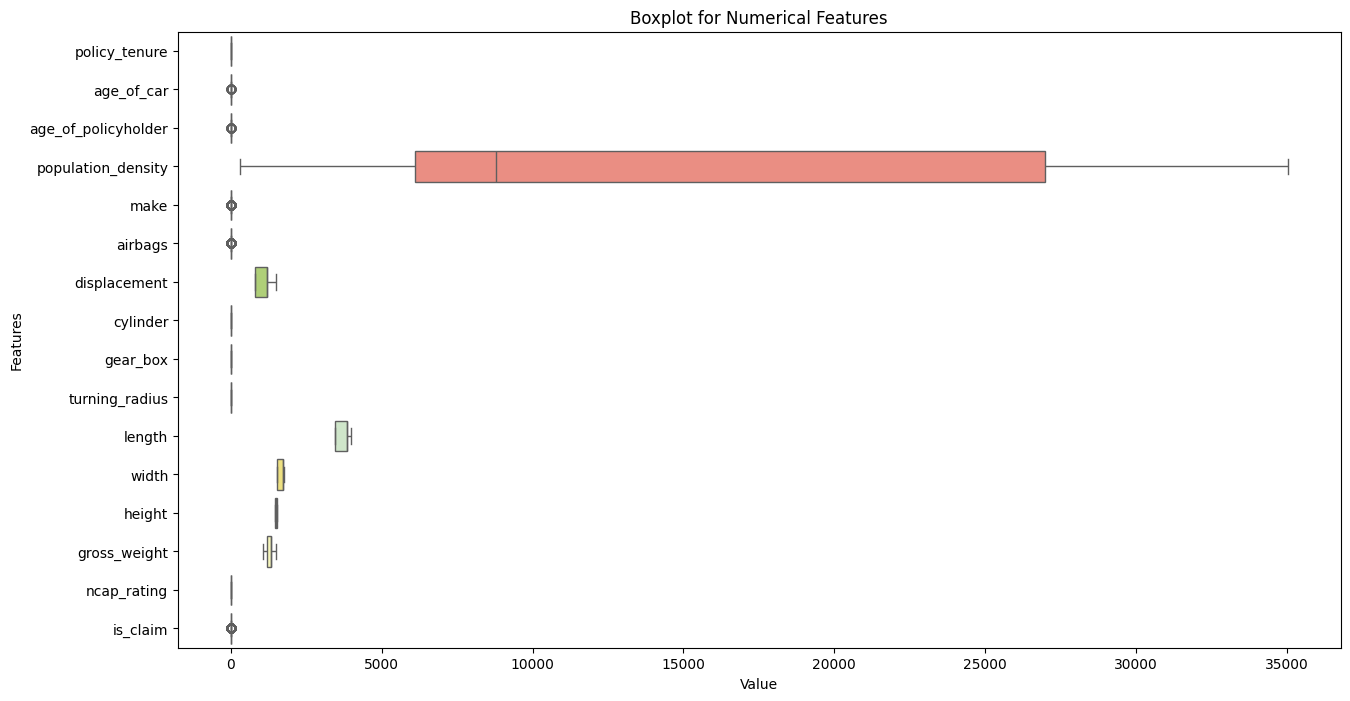

In [37]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set3')
plt.title('Boxplot for Numerical Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

## Encoding with label encoder
### used label encoding as order matters here

In [38]:
columns_to_encode = [
    'is_brake_assist',
    'engine_type',
    'is_power_door_locks',
    'is_central_locking',
    'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror',
    'is_ecw',
    'segment',
    'model',
    'area_cluster',
    'fuel_type',
    'is_rear_window_defogger',
    'is_rear_window_washer',
    'is_rear_window_wiper',
    'is_front_fog_lights',
    'steering_type',
    'transmission_type',
    'is_parking_camera',
    'is_parking_sensors',
    'is_adjustable_steering',
    'is_esc',
]

label_encoders = {}

for column in columns_to_encode:
    label_encoder=LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 35835 entries, 0 to 58590
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     35835 non-null  float64
 1   age_of_car                        35835 non-null  float64
 2   age_of_policyholder               35835 non-null  float64
 3   area_cluster                      35835 non-null  int64  
 4   population_density                35835 non-null  int64  
 5   make                              35835 non-null  int64  
 6   segment                           35835 non-null  int64  
 7   model                             35835 non-null  int64  
 8   fuel_type                         35835 non-null  int64  
 9   max_torque                        35835 non-null  object 
 10  max_power                         35835 non-null  object 
 11  engine_type                       35835 non-null  int64  
 12  airbags  

## split those object columns into two columns with float values

In [39]:
# encode max_torque into two seperated numerical columns 
df['torque_nm'] = df['max_torque'].str.extract(r'(\d+)Nm').astype(float)  
df['torque_rpm'] = df['max_torque'].str.extract(r'@(\d+)rpm').astype(float)  

# encode map__power into two seperated numerical columns 
df['hp'] = df['max_power'].str.extract(r'(\d+(\.\d+)?)bhp')[0].astype(float)  
df['hp_rpm'] = df['max_power'].str.extract(r'@(\d+)rpm')[0].astype(float)  

df = df.drop(columns=['max_torque', 'max_power'])



## Display all columns to make sure that all data has been encoded 

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,ncap_rating,is_claim,torque_nm,torque_rpm,hp,hp_rpm
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,4,2,0,0,1,0,796,3,1,5,1,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,0,0,0,0,0,60.0,3500.0,40.36,6000.0
1,0.672619,0.02,0.375000,9,27003,1,0,0,0,4,2,0,0,1,0,796,3,1,5,1,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,0,0,0,0,0,60.0,3500.0,40.36,6000.0
2,0.841110,0.02,0.384615,13,4076,1,0,0,0,4,2,0,0,1,0,796,3,1,5,1,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,0,0,0,0,0,60.0,3500.0,40.36,6000.0
3,0.900277,0.11,0.432692,14,21622,1,2,1,2,2,2,1,1,1,1,1197,4,0,5,0,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,2,0,113.0,4400.0,88.50,6000.0
4,0.596403,0.11,0.634615,15,34738,2,0,2,2,0,2,0,0,0,1,999,3,0,5,0,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,0,1,1,2,0,91.0,4250.0,67.06,5500.0


## Scaling with standard scaller

In [41]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
numerical_cols = [col for col in numerical_cols if col != 'is_claim']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Training model

## Split data into train and test sets 

In [42]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop("is_claim", axis=1)  
y = df["is_claim"]



### Handle unbalanced class

In [43]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X, y = oversampler.fit_resample(X, y)  
print(f"Class distribution before oversampling: {y.value_counts()}")


Class distribution before oversampling: is_claim
0    33478
1    33478
Name: count, dtype: int64


### split train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

## train the model

In [45]:
model = RandomForestClassifier(
    max_depth=16,
    n_estimators=70,
)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=16, n_estimators=70)

### predict on testing set

In [46]:
y_pred = model.predict(X_test)

## Model evaluation
### get the

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9165173237753883
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      6621
           1       0.87      0.99      0.92      6771

    accuracy                           0.92     13392
   macro avg       0.93      0.92      0.92     13392
weighted avg       0.93      0.92      0.92     13392



## display confusion matrix

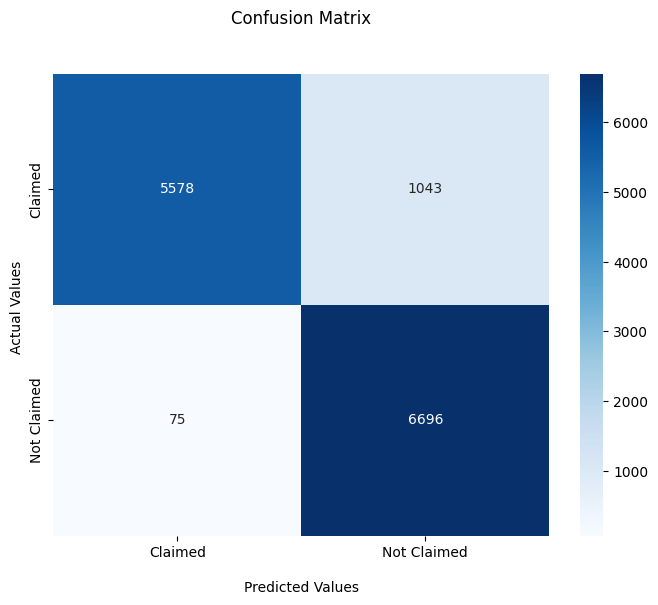

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_title('Confusion Matrix' + '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')


ax.xaxis.set_ticklabels(['Claimed', 'Not Claimed'])
ax.yaxis.set_ticklabels(['Claimed', 'Not Claimed'])
plt.show()


### Predectid VS Actual values

In [49]:
from IPython.display import display
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df)

,Actual,Predicted
51529,1,1
2607,0,0
47383,1,1
59492,1,1
13630,0,0
...,...,...
3674,0,0
52461,1,1
6249,0,0
32669,0,0


# Test with unseen data

In [50]:
unseen_data_list = pd.DataFrame({
    "policy_tenure": [0.9],
    "age_of_car": [0.05],
    "age_of_policyholder": [999.644230769230769],
    "area_cluster": ["C1"],
    "population_density": [4990],
    "make": [1],
    "segment": ["A"],
    "model": ["M1"],
    "fuel_type": ["CNG"],
    "max_torque": ["60Nm@3500rpm"],
    "max_power": ["40.36bhp@6000rpm"],
    "engine_type": ["1.0 SCe"],
    "airbags": [2],
    "is_esc": ["Yes"],
    "is_adjustable_steering": ["No"],
    "is_parking_sensors": ["No"],
    "is_parking_camera": ["No"],
    "displacement": [796],
    "cylinder": [3],
    "transmission_type": ["Manual"],
    "gear_box": [5],
    "steering_type": ["Power"],
    "turning_radius": [4.6],
    "length": [3445],
    "width": [1515],
    "height": [1475],
    "gross_weight": [1185],
    "is_front_fog_lights": ["No"],
    "is_rear_window_wiper": ["No"],
    "is_rear_window_washer": ["No"],
    "is_rear_window_defogger": ["Yes"],
    "is_brake_assist": ["Yes"],
    "is_power_door_locks": ["Yes"],
    "is_central_locking": ["Yes"],
    "is_driver_seat_height_adjustable": ["Yes"],
    "is_day_night_rear_view_mirror": ["Yes"],
    "is_ecw": ["Yes"],
    "ncap_rating": [0],
})


### preprocessing for unseen data

In [51]:
columns_to_encode = [
    'is_brake_assist',
    'engine_type',
    'is_power_door_locks',
    'is_central_locking',
    'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror',
    'is_ecw',
    'segment',
    'model',
    'area_cluster',
    'fuel_type',
    'is_rear_window_defogger',
    'is_rear_window_washer',
    'is_rear_window_wiper',
    'is_front_fog_lights',
    'steering_type',
    'transmission_type',
    'is_parking_camera',
    'is_parking_sensors',
    'is_adjustable_steering',
    'is_esc',
]


for column in columns_to_encode:
    unseen_data_list[column] = label_encoders[column].transform(unseen_data_list[column])

print(unseen_data_list)


   policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0            0.9        0.05           999.644231             0   

   population_density  make  segment  model  fuel_type    max_torque  \
0                4990     1        0      0          0  60Nm@3500rpm   

          max_power  engine_type  airbags  is_esc  is_adjustable_steering  \
0  40.36bhp@6000rpm            0        2       1                       0   

   is_parking_sensors  is_parking_camera  displacement  cylinder  \
0                   0                  0           796         3   

   transmission_type  gear_box  steering_type  turning_radius  length  width  \
0                  1         5              1             4.6    3445   1515   

   height  gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0    1475          1185                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        1       

In [52]:

unseen_data_list['torque_nm'] = unseen_data_list['max_torque'].str.extract(r'(\d+)Nm').astype(float)
unseen_data_list['torque_rpm'] = unseen_data_list['max_torque'].str.extract(r'@(\d+)rpm').astype(float)
unseen_data_list['hp'] = unseen_data_list['max_power'].str.extract(r'(\d+(\.\d+)?)bhp')[0].astype(float)
unseen_data_list['hp_rpm'] = unseen_data_list['max_power'].str.extract(r'@(\d+)rpm')[0].astype(float)
unseen_data_list = unseen_data_list.drop(columns=['max_torque', 'max_power'])

unseen_data_list[numerical_cols] = scaler.transform(unseen_data_list[numerical_cols])


predictions = model.predict(unseen_data_list)


probabilities = model.predict_proba(unseen_data_list)


print("Predictions:", predictions)
print("Prediction Probabilities:", probabilities)


Predictions: [0]
Prediction Probabilities: [[0.77278843 0.22721157]]
